In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.11.0
Is Executing Eagerly? True


In [ ]:
def display_test_images(x_test, decoded_imgs):

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(1, n + 1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


In [ ]:
def loss_plot(model_history, title):
    training_loss = model_history.history['loss']
    test_loss = model_history.history['val_loss']
    epoch_count = range(1, len(training_loss) + 1)

    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.show();

In [ ]:
def plot_loss(model):
    plt.plot(range(10), model.loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

# Task1: Dense Architecture

In [ ]:
from keras.datasets import mnist
import numpy as np
import keras
from keras.callbacks import TensorBoard

(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(128, activation='relu')(input_img)

decoded = keras.layers.Dense(128, activation='relu')(encoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

In [ ]:
autoencoder1 = keras.Model(input_img, decoded)
autoencoder1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss=loss)
autoencoder1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,128
Trainable params: 218,128
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = autoencoder1.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder1')])

Epoch 1/100
235/235 [==============================] - 12s 12ms/step - loss: 0.0288 - val_loss: 0.0114
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0096 - val_loss: 0.0080
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0075 - val_loss: 0.0065
Epoch 4/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0050 - val_

313/313 [==============================] - 1s 1ms/step


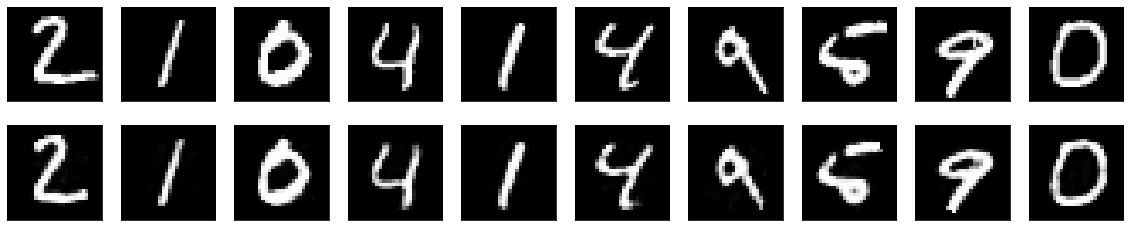

In [ ]:
decoded_images = autoencoder1.predict(x_test)
display_test_images(x_test, decoded_images)

# Custom Defined Dense Architecture 1

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(128, activation='relu')(input_img)
encoded = keras.layers.BatchNormalization()(encoded)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.BatchNormalization()(encoded)

decoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.BatchNormalization()(decoded)
decoded = keras.layers.Dense(128, activation='relu')(decoded)
encoded = keras.layers.BatchNormalization()(decoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder2 = keras.Model(input_img, decoded)
autoencoder2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss=loss)
autoencoder2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 64)                4160

In [ ]:
history2 = autoencoder2.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 6ms/step - loss: 0.0294 - val_loss: 0.0282
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0151 - val_loss: 0.0155
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0125 - val_loss: 0.0122
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0111 - val_loss: 0.0118
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 9/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0077 - val_lo

In [ ]:
decoded_images = autoencoder2.predict(x_test)
display_test_images(x_test, decoded_images)

# Custom defined Dense Architecture 2

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(256, activation='relu')(input_img)

decoded = keras.layers.Dense(256, activation='relu')(encoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder3 = keras.Model(input_img, decoded)
autoencoder3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss=loss)
autoencoder3.summary()

In [ ]:
history3 = autoencoder3.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
decoded_images = autoencoder3.predict(x_test)
display_test_images(x_test, decoded_images)

# Basic CNN

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder4 = tf.keras.models.Model(input_img, decoded)
autoencoder4.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
history4 = autoencoder4.fit(x_train, x_train, epochs=100, batch_size=128,
                shuffle=True, validation_data=(x_test, x_test),
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

In [ ]:
decoded_images = autoencoder4.predict(x_test)
display_test_images(x_test, decoded_images)

# Complex CNN

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import RootMeanSquaredError

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

encoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
encoded = BatchNormalization()(encoded)
encoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
encoded = BatchNormalization()(encoded)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = BatchNormalization()(encoded)
encoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = BatchNormalization()(encoded)
encoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = BatchNormalization()(encoded)
encoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)

# print(encoded)

decoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = BatchNormalization()(decoded)
decoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = BatchNormalization()(decoded)
decoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = BatchNormalization()(decoded)
decoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = BatchNormalization()(decoded)

decoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(decoded)
decoded = BatchNormalization()(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(decoded)
decoded = BatchNormalization()(decoded)


decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)


In [ ]:
autoencoder5 = tf.keras.models.Model(input_img, decoded)
autoencoder5.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
autoencoder5.summary()

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "improved_cnn_section1.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [ ]:

history5 = autoencoder5.fit(x_train, x_train, epochs=100, batch_size=128,
                shuffle=True, validation_data=(x_test, x_test),
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder'), checkpoint])

In [ ]:
decoded_images = autoencoder5.predict(x_test)
display_test_images(x_test, decoded_images)

# Summary of above

1. Model 1 = Dense 128, Adam, le-2, loss 0.0043
2. Model 2 = Dense 128, 64, Adam, le-2, loss 0.0041
3. Model 3 = Dense 256, Adam, le-2 loss 0.0034
4. Model 4 = Basic CNN - 16, 8, 8, Maxpool, adadelta,
crossentropy, loss 0.19
5. Model 5 = CNN 128, 64, 32, Maxpool, Batch normalization , adam, loss = 0.0042

From the above experiments, for simple image reconstruction:
1. only one Dense layer is enough for a good accuracy. 2. The accuracy did not improve with adding more layers to Dense network.
3. Increasing the neurons from 128 to 256 in Dense layer has slightly improved the accuracy but increasing even more to 512 did not change anything
4. The CNN's perform similar to dense since it is a simple image reconstruction and even dense networks can work better as there is not a lot of spatial information.
5. Simple CNN will of course not work better as number of filters are very less.
6. Increasing the filters, adding Maxpool and batchnormalizing has given siliar results to that of a dense model.
7. Also from the graph we can see that complex CNN in fact dont need a lot of epochs to get trained
8. Adam optimizers are better than adadelta

In [ ]:
loss_plot(history1, "Dense 128, Adam, le-2, loss 0.0043")
loss_plot(history2, "Dense 128, 64, Adam, le-2, loss 0.0041")
loss_plot(history3, "Dense 256, Adam, le-2, loss 0.0034")
loss_plot(history4, "Basic CNN - 16, 8, 8, Maxpool, adadelta, crossentropy, loss 0.19")
loss_plot(history5, "CNN 128, 64, 32, Maxpool, Batch normalization , adam, loss = 0.0042")

# Custom dense Architecture 1

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(128, activation='relu')(input_img)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.BatchNormalization()(encoded)

decoded = keras.layers.Dense(128, activation='relu')(encoded)
decoded = keras.layers.BatchNormalization()(decoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder6 = keras.Model(input_img, decoded)
autoencoder6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss=loss)
autoencoder6.summary()

In [ ]:
history6 = autoencoder6.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder1')])

In [ ]:
decoded_images = autoencoder6.predict(x_test_noisy)
display_test_images(x_test_noisy, decoded_images)

# Custom Dense Architecture 2

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(256, activation='relu')(input_img)
encoded = keras.layers.Dense(128, activation='relu')(encoded)
encoded = keras.layers.BatchNormalization()(encoded)

decoded = keras.layers.Dense(128, activation='relu')(encoded)
decoded = keras.layers.Dense(256, activation='relu')(decoded)
decoded = keras.layers.BatchNormalization()(decoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder7 = keras.Model(input_img, decoded)
autoencoder7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss=loss)
autoencoder7.summary()

In [ ]:
history7 = autoencoder7.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder1')])

In [ ]:
decoded_images = autoencoder7.predict(x_test_noisy)
display_test_images(x_test_noisy, decoded_images)

# Custom Simple CNN Architecture 1

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder8 = tf.keras.models.Model(input_img, decoded)
autoencoder8.compile(optimizer='adadelta', loss=loss)

In [ ]:
history8 = autoencoder8.fit(x_train_noisy, x_train, epochs=100, batch_size=128,
                shuffle=True, validation_data=(x_test_noisy, x_test),
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

In [ ]:
decoded_images = autoencoder8.predict(x_test_noisy)
display_test_images(x_test_noisy, decoded_images)

# Custom Complex CNN Architecture 1

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import RootMeanSquaredError

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

encoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = BatchNormalization()(encoded)
encoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)

# print(encoded)

decoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = BatchNormalization()(decoded)
decoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)


In [ ]:
autoencoder9 = tf.keras.models.Model(input_img, decoded)
autoencoder9.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
autoencoder9.summary()

In [ ]:
history9 = autoencoder9.fit(x_train_noisy, x_train, epochs=100, batch_size=128,
                shuffle=True, validation_data=(x_test_noisy, x_test),
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

In [ ]:
decoded_images = autoencoder9.predict(x_test_noisy)
display_test_images(x_test_noisy, decoded_images)

# Summary of section 2

1. Model 6 = Dense 128, 64, 128, Batch Norm Adam, le-2, loss 0.014
2. Model 7 = Dense 256, 128, Batch Norm, Adam, loss 0.012
3. Model 8 = Basic CNN - 16, 8, 8, Maxpool, adadelta,
crossentropy, 0.05
4. Model 9 = 128, 64, 32, Maxpool, batch norm, 0.09

1. CNNs have an advantage over dense neural networks due to their ability to learn spatial patterns in the data
2. We can see that CNNs are more effective than dense neural networks for handling noisy data because they use pooling layers to reduce the effects of noise in the data.
So for this kind of data which is complex non-linear, dense networks may not be of great help

In [ ]:
loss_plot(history6, "Dense 128, 64, 128, Batch Norm Adam, le-2, loss 0.014")
loss_plot(history7, "256, 128, Batch Norm, Adam, loss 0.012")
loss_plot(history8, "Basic CNN - 16, 8, 8, Maxpool, adadelta, crossentropy, 0.05")
loss_plot(history9, "128, 64, 32, Maxpool, batch norm, 0.0069")

# Text Reconstruction Dense model 1

In [ ]:
from keras import backend as K

# Do some code, e.g. train and save model

K.clear_session()

In [ ]:
def print_recontructed_text(X_test, predicted_label):

    for i in range(4):
      f, ax = plt.subplots(1,2, figsize=(10,8))
      ax[0].imshow(np.squeeze(X_test[i]), cmap='gray')
      ax[1].imshow(predicted_label[i], cmap='gray')
    plt.show()

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pathlib import Path
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
np.random.seed(111)

In [ ]:
auth.authenticate_user()
g_auth = GoogleAuth()
g_auth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(g_auth)
drive

In [ ]:
file_id = drive.ListFile({'q':"title='train.zip'"}).GetList()[0]
f1 = drive.CreateFile({'id': file_id['id']})
f1.GetContentFile('train.zip')

file_id = drive.ListFile({'q':"title='train_cleaned.zip'"}).GetList()[0]
f2 = drive.CreateFile({'id': file_id['id']})
f2.GetContentFile('train_cleaned.zip')

file_id = drive.ListFile({'q':"title='test.zip'"}).GetList()[0]
f3 = drive.CreateFile({'id': file_id['id']})
f3.GetContentFile('test.zip')

In [ ]:
!unzip train.zip
!unzip train_cleaned.zip
!unzip test.zip

In [ ]:
path_files = '/content/'

In [ ]:
import os
train_directory = os.path.join(path_files,
                         'train')
train_cleaned_directory = os.path.join(path_files,
                         'train_cleaned')
test_directory = os.path.join(path_files,
                        'test')

In [ ]:
X = []
Y = []
X_test = []

for img in os.listdir(train_directory):
    img = load_img(train_directory + "/" + img, color_mode = "grayscale",target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in os.listdir(train_cleaned_directory):
    img = load_img(train_cleaned_directory + "/" + img, color_mode = "grayscale",target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in os.listdir(test_directory):
    img = load_img(test_directory + "/" + img, color_mode = "grayscale",target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X_test.append(img)
    if len(X_test) == 4:
      break


X = np.array(X)
Y = np.array(Y)
X_test = np.array(X_test)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)

In [ ]:
import tensorflow as tf
from tensorflow.keras.metrics import RootMeanSquaredError
import keras

input_img = tf.keras.layers.Input(shape=(226800))
encoder = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoder = tf.keras.layers.BatchNormalization()(encoder)
encoder = tf.keras.layers.Dense(64, activation='relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

decoder = tf.keras.layers.Dense(64, activation='relu')(encoder)
decoder = tf.keras.layers.BatchNormalization()(decoder)
decoder = tf.keras.layers.Dense(226800, activation='sigmoid')(decoder)

autoencoder10 = tf.keras.models.Model(inputs=input_img, outputs=decoder)
autoencoder10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss=tf.keras.losses.MSE, metrics = [RootMeanSquaredError()]) #loss=tf.keras.losses.MSE


In [ ]:
# Train your model
X_train_flattend = np.reshape(X_train, (len(X_train), 226800))
X_valid_flattend = np.reshape(X_valid, (len(X_valid), 226800))
y_train_flattend = np.reshape(y_train, (len(y_train), 226800))
y_valid_flattend = np.reshape(y_valid, (len(y_valid), 226800))

X_test_flattend  = np.reshape(X_test, (len(X_test), 226800))

history10 = autoencoder10.fit(X_train_flattend,y_train_flattend,
                      epochs=100,
                      batch_size=5,
                      validation_data=(X_valid_flattend, y_valid_flattend))

In [ ]:
# Compute the prediction
predicted_label = autoencoder10.predict(X_test_flattend)
print_recontructed_text(X_test, predicted_label)

# Basic CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.metrics import RootMeanSquaredError

input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format

encoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)

decoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder11 = tf.keras.models.Model(inputs = input_img, outputs = decoded)
autoencoder11.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-2),
                      loss='mse',
                      metrics = [RootMeanSquaredError()])


In [ ]:
autoencoder11.summary()

history11 = autoencoder11.fit(X_train, y_train,
                  epochs=100,
                  batch_size=3,
                  validation_data=(X_valid, y_valid))

In [ ]:

predicted_label = np.squeeze(autoencoder11.predict(X_test))
print_recontructed_text(X_test, predicted_label)

# Complex CNN 1

In [ ]:

input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format
encoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
encoded = tf.keras.layers.BatchNormalization()(encoded)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
encoded = tf.keras.layers.BatchNormalization()(encoded)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)

decoded = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
decoded = tf.keras.layers.BatchNormalization()(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = tf.keras.layers.BatchNormalization()(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder12 = tf.keras.models.Model(inputs = input_img, outputs = decoded)
autoencoder12.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
                    loss='mse',
                    metrics=[RootMeanSquaredError()])


In [ ]:

autoencoder12.summary()
history12 = autoencoder12.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_valid, y_valid))

In [ ]:

predicted_label = np.squeeze(autoencoder12.predict(X_test))
print_recontructed_text(X_test, predicted_label)

# Complex CNN 2

In [ ]:

input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format
encoded = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
encoded = tf.keras.layers.Conv2D(72, (3, 3), activation='relu', padding='same')(encoded)
encoded = tf.keras.layers.Conv2D(144, (3, 3), activation='relu', padding='same')(encoded)
encoded = tf.keras.layers.BatchNormalization()(encoded)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)

encoded = tf.keras.layers.Dropout(0.5)(encoded)


decoded = tf.keras.layers.Conv2D(144, (3, 3), activation='relu', padding='same')(encoded)
decoded = tf.keras.layers.Conv2D(72, (3, 3), activation='relu', padding='same')(decoded)
decoded = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')(decoded)
decoded = tf.keras.layers.BatchNormalization()(decoded)
decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder13 = tf.keras.models.Model(inputs = input_img, outputs = decoded)
autoencoder13.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), loss='mse', metrics=[RootMeanSquaredError()])


In [ ]:
autoencoder13.summary()

In [ ]:
history13 = autoencoder13.fit(X_train, y_train,
                  epochs=100,
                  batch_size=10,
                  validation_data=(X_valid, y_valid),
                  shuffle=True)

In [ ]:

predicted_label = np.squeeze(autoencoder13
                             .predict(X_test))
print_recontructed_text(X_test, predicted_label)

# Summary of section 3

1. Model 10 = Dense 128, 64, 128, Adam, le-2, loss 0.17
2. Model 11 = CNN 128, 64, Maxpool, Adam, loss 0.28
3. Model 12 = CNN 64, 128, Maxpool, Batch norm, Adam, loss 0.04
4. Model 13 = 48, 72, 144, Maxpool, batch norm, dropout, 0.02

1. In case of text recontruction the dense models do not perform good as CNN's
2.  In a dense model, each input feature is processed independently, without regard for its position in the sequence. This makes it difficult for the model to capture the complex relationships between different words or characters in the input sequence, which are crucial for generating accurate reconstructions.
3. Basic CNN's  will require a large number of filters and layers to achieve good performance on text data, which can increase the risk of overfitting. To overcome that, in the complex CNN's I have used Maxpool layer.
4. Also the best accuracy is when we add dropout layer to the CNN's

In [ ]:
loss_plot(history10, "Dense 128, 64, 128, Adam, le-2, loss 0.17")
loss_plot(history11, "CNN 128, 64, Maxpool, Adam, loss 0.28")
loss_plot(history12, "CNN 64, 128, Maxpool, Batch norm, Adam, loss 0.04")
loss_plot(history13, "48, 72, 144, Maxpool, batch norm, dropout, 0.02")
